# Medical Insurance Premium Prediction with Machine Learning

Course Notes - Coursera

**AM Gomez Ardila**

En este proyecto desarrollaremos, entrenaremos y probaremos un modelo de aprendizaje automático para predecir el costo del seguro según características del cliente, como edad, sexo, índice de masa corporal (IMC), número de hijos, tabaquismo y geolocalización. Este proyecto guiado es práctico y directamente aplicable al sector asegurador.

Objetivos

- Realizar limpieza de datos, ingeniería de características y visualización. 
- Construir, entrenar y probar un modelo de red neuronal artificial en Keras y Tensorflow. 
- Comprender la teoría y la intuición detrás de las redes neuronales artificiales.

## Importar librerias y datos

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [218]:
insurance_df = pd.read_csv("dataset_insurance.csv") 
insurance_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [219]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Análisis exploratorio

<Axes: >

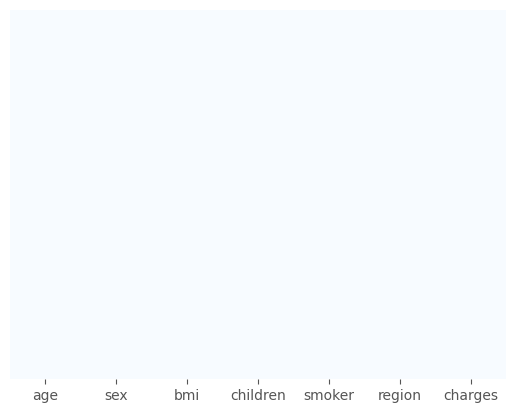

In [220]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [221]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [222]:
insurance_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [223]:
# Agrupamos por región y calculamos el promedio de charges y bmi
insurance_df.groupby("region")[["age","bmi","children","charges"]].mean().sort_values("charges", ascending=False)


age        bmi  children       charges
region                                                 
southeast  38.939560  33.355989  1.049451  14735.411438
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southwest  39.455385  30.596615  1.141538  12346.937377

/var/folders/0j/t_0x2m2j7g5dsyryj8t31x640000gn/T/ipykernel_42807/3202127166.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="charges", data=insurance_df, estimator='mean', ci=None)


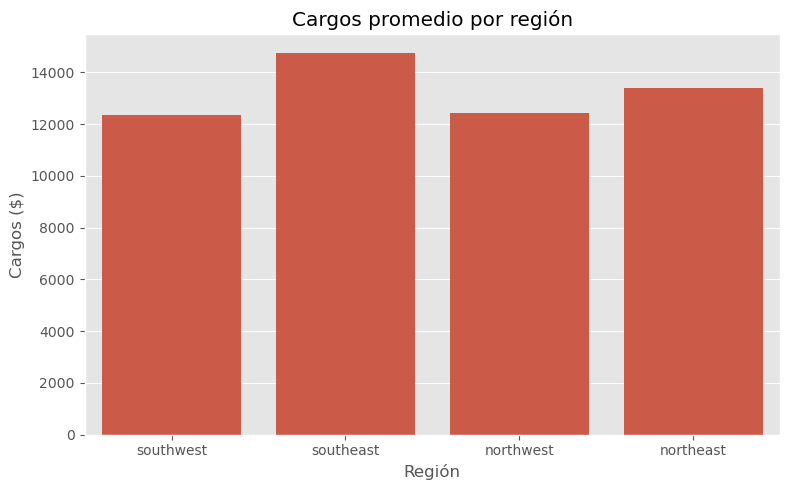

In [224]:
# Visualizar los cargos promedio por región
plt.figure(figsize=(8, 5))
sns.barplot(x="region", y="charges", data=insurance_df, estimator='mean', ci=None)
plt.title("Cargos promedio por región")
plt.ylabel("Cargos ($)")
plt.xlabel("Región")
plt.tight_layout()
plt.show()

/var/folders/0j/t_0x2m2j7g5dsyryj8t31x640000gn/T/ipykernel_42807/1530431570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="bmi", data=insurance_df, estimator='mean', ci=None, palette='pastel')
/var/folders/0j/t_0x2m2j7g5dsyryj8t31x640000gn/T/ipykernel_42807/1530431570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="bmi", data=insurance_df, estimator='mean', ci=None, palette='pastel')


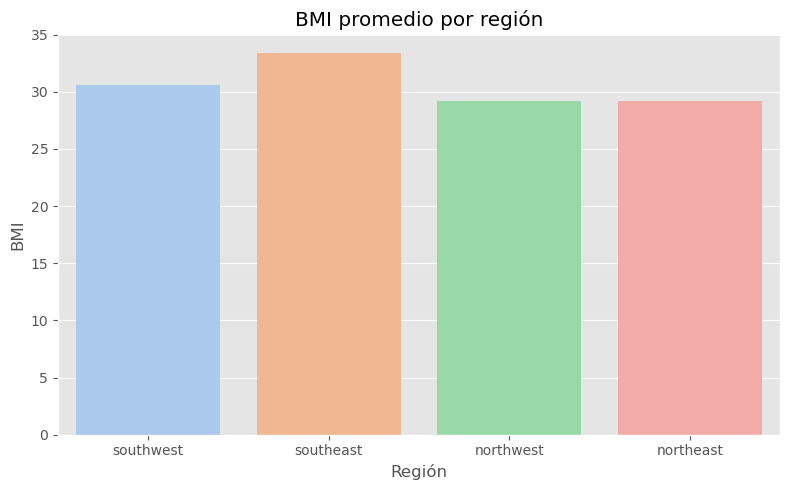

In [225]:
# Visualizar el BMI promedio por región
plt.figure(figsize=(8, 5))
sns.barplot(x="region", y="bmi", data=insurance_df, estimator='mean', ci=None, palette='pastel')
plt.title("BMI promedio por región")
plt.ylabel("BMI")
plt.xlabel("Región")
plt.tight_layout()
plt.show()

/var/folders/0j/t_0x2m2j7g5dsyryj8t31x640000gn/T/ipykernel_42807/1897755649.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age", y="charges", data=insurance_df, estimator='mean', ci=None, palette='pastel')
/var/folders/0j/t_0x2m2j7g5dsyryj8t31x640000gn/T/ipykernel_42807/1897755649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age", y="charges", data=insurance_df, estimator='mean', ci=None, palette='pastel')


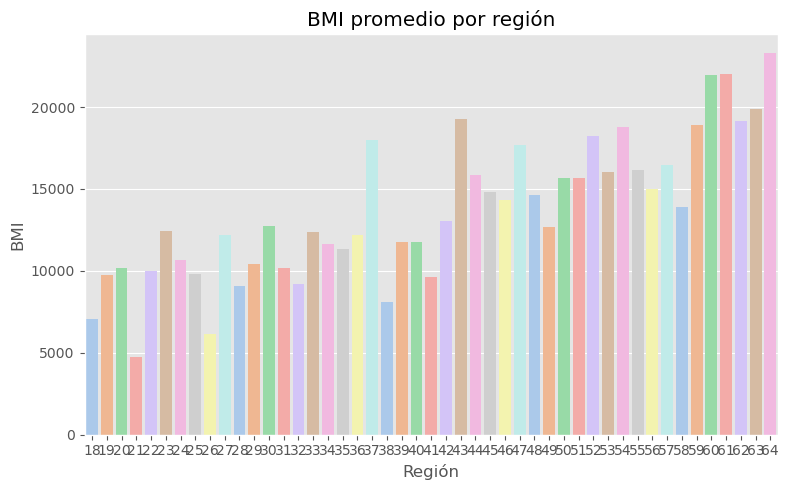

In [226]:
# Visualizar el BMI promedio por región
plt.figure(figsize=(8, 5))
sns.barplot(x="age", y="charges", data=insurance_df, estimator='mean', ci=None, palette='pastel')
plt.title("BMI promedio por región")
plt.ylabel("BMI")
plt.xlabel("Región")
plt.tight_layout()
plt.show()

In [227]:
insurance_df.groupby('age')['charges'].mean()

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

In [228]:
# Seleccionamos solo columnas numéricas
numeric_cols = insurance_df.select_dtypes(include='number').columns

# Agrupamos por edad y aplicamos el promedio solo a columnas numéricas
insurance_df.groupby('age')[numeric_cols].mean()

age        bmi  children       charges
age                                         
18   18.0  31.326159  0.449275   7086.217556
19   19.0  28.596912  0.426471   9747.909335
20   20.0  30.632759  0.862069  10159.697736
21   21.0  28.185714  0.785714   4730.464330
22   22.0  31.087679  0.714286  10012.932802
23   23.0  31.454464  1.000000  12419.820040
24   24.0  29.142679  0.464286  10648.015962
25   25.0  29.693929  1.285714   9838.365311
26   26.0  29.428929  1.071429   6133.825309
27   27.0  29.333571  0.964286  12184.701721
28   28.0  29.482143  1.285714   9069.187564
29   29.0  29.383148  1.259259  10430.158727
30   30.0  30.557593  1.555556  12719.110358
31   31.0  29.918333  1.407407  10196.980573
32   32.0  31.597692  1.269231   9220.300291
33   33.0  31.163077  1.538462  12351.532987
34   34.0  30.274038  1.153846  11613.528121
35   35.0  31.394800  1.680000  11307.182031
36   36.0  29.374200  1.240000  12204.476138
37   37.0  31.216600  1.520000  18019.911877
38   38.0  28.996600  1.480000   8102.733674
39   39.0  29.910200  2.200000  11778.242945
40   40.0  30.139074  1.592593  11772.251310
41   41.0  31.506852  1.407407   9653.745650
42   42.0  30.328148  1.000000  13061.038669
43   43.0  30.204444  1.629630  19267.278653
44   44.0  30.844259  1.222222  15859.396587
45   45.0  29.778966  1.482759  14830.199856
46   46.0  31.340862  1.620690  14342.590639
47   47.0  30.664310  1.379310  17653.999593
48   48.0  31.925690  1.310345  14632.500445
49   49.0  30.313929  1.500000  12696.006264
50   50.0  31.132241  1.310345  15663.003301
51   51.0  31.727069  1.103448  15682.255867
52   52.0  32.936034  1.482759  18256.269719
53   53.0  30.360893  1.250000  16020.930755
54   54.0  31.234286  1.428571  18758.546475
55   55.0  31.950000  0.961538  16164.545488
56   56.0  31.600962  0.769231  15025.515837
57   57.0  30.844423  0.615385  16447.185250
58   58.0  32.718200  0.240000  13878.928112
59   59.0  30.572000  1.200000  18895.869532
60   60.0  30.332826  0.347826  21979.418507
61   61.0  32.548261  0.739130  22024.457609
62   62.0  32.342609  0.565217  19163.856573
63   63.0  31.923478  0.565217  19884.998461
64   64.0  32.976136  0.772727  23275.530837

## Ingenieria de caracteristicas

In [229]:
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [230]:
# Convertir variable categorica a numerica
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df

age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [231]:
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [232]:
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)
insurance_df

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

In [233]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [234]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)*1

In [235]:
region_dummies

northwest  southeast  southwest
0             0          0          1
1             0          1          0
2             0          1          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
1333          1          0          0
1334          0          0          0
1335          0          1          0
1336          0          0          1
1337          1          0          0

[1338 rows x 3 columns]

In [236]:
insurance_df.drop(['region'], axis = 1, inplace = True)
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)


In [237]:
insurance_df

age  sex     bmi  children  smoker      charges  northwest  southeast  \
0      19    0  27.900         0       1  16884.92400          0          0   
1      18    1  33.770         1       0   1725.55230          0          1   
2      28    1  33.000         3       0   4449.46200          0          1   
3      33    1  22.705         0       0  21984.47061          1          0   
4      32    1  28.880         0       0   3866.85520          1          0   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1333   50    1  30.970         3       0  10600.54830          1          0   
1334   18    0  31.920         0       0   2205.98080          0          0   
1335   18    0  36.850         0       0   1629.83350          0          1   
1336   21    0  25.800         0       0   2007.94500          0          0   
1337   61    0  29.070         0       1  29141.36030          1          0   

      southwest  
0             1  
1             0  
2             0  
3             0  
4             0  
...         ...  
1333          0  
1334          0  
1335          0  
1336          1  
1337          0  

[1338 rows x 9 columns]

## DataViz

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

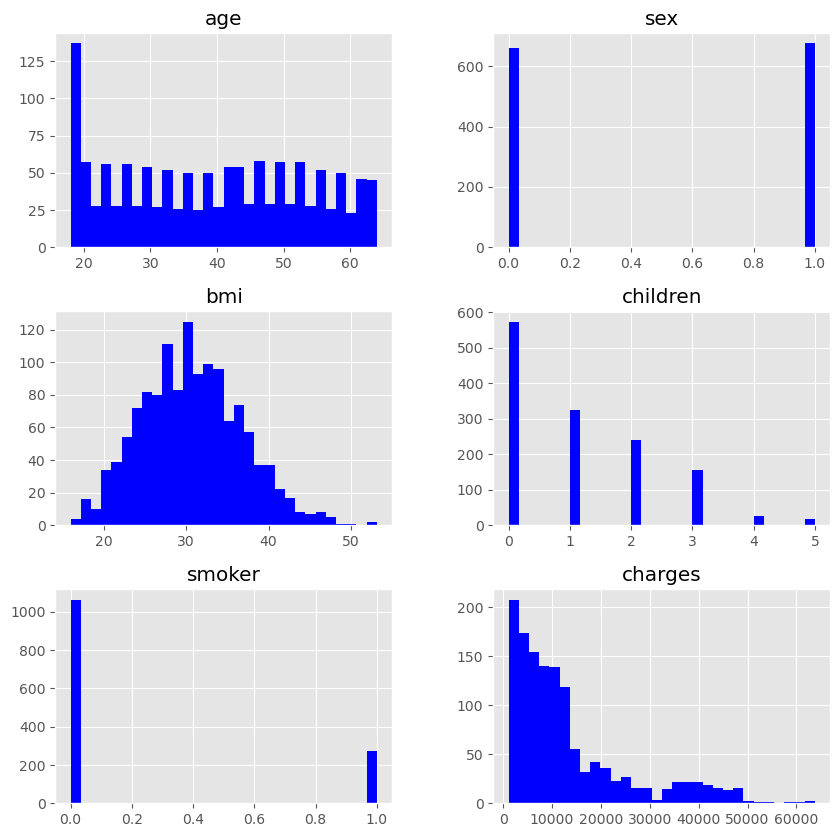

In [238]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (10,10), color = 'blue')

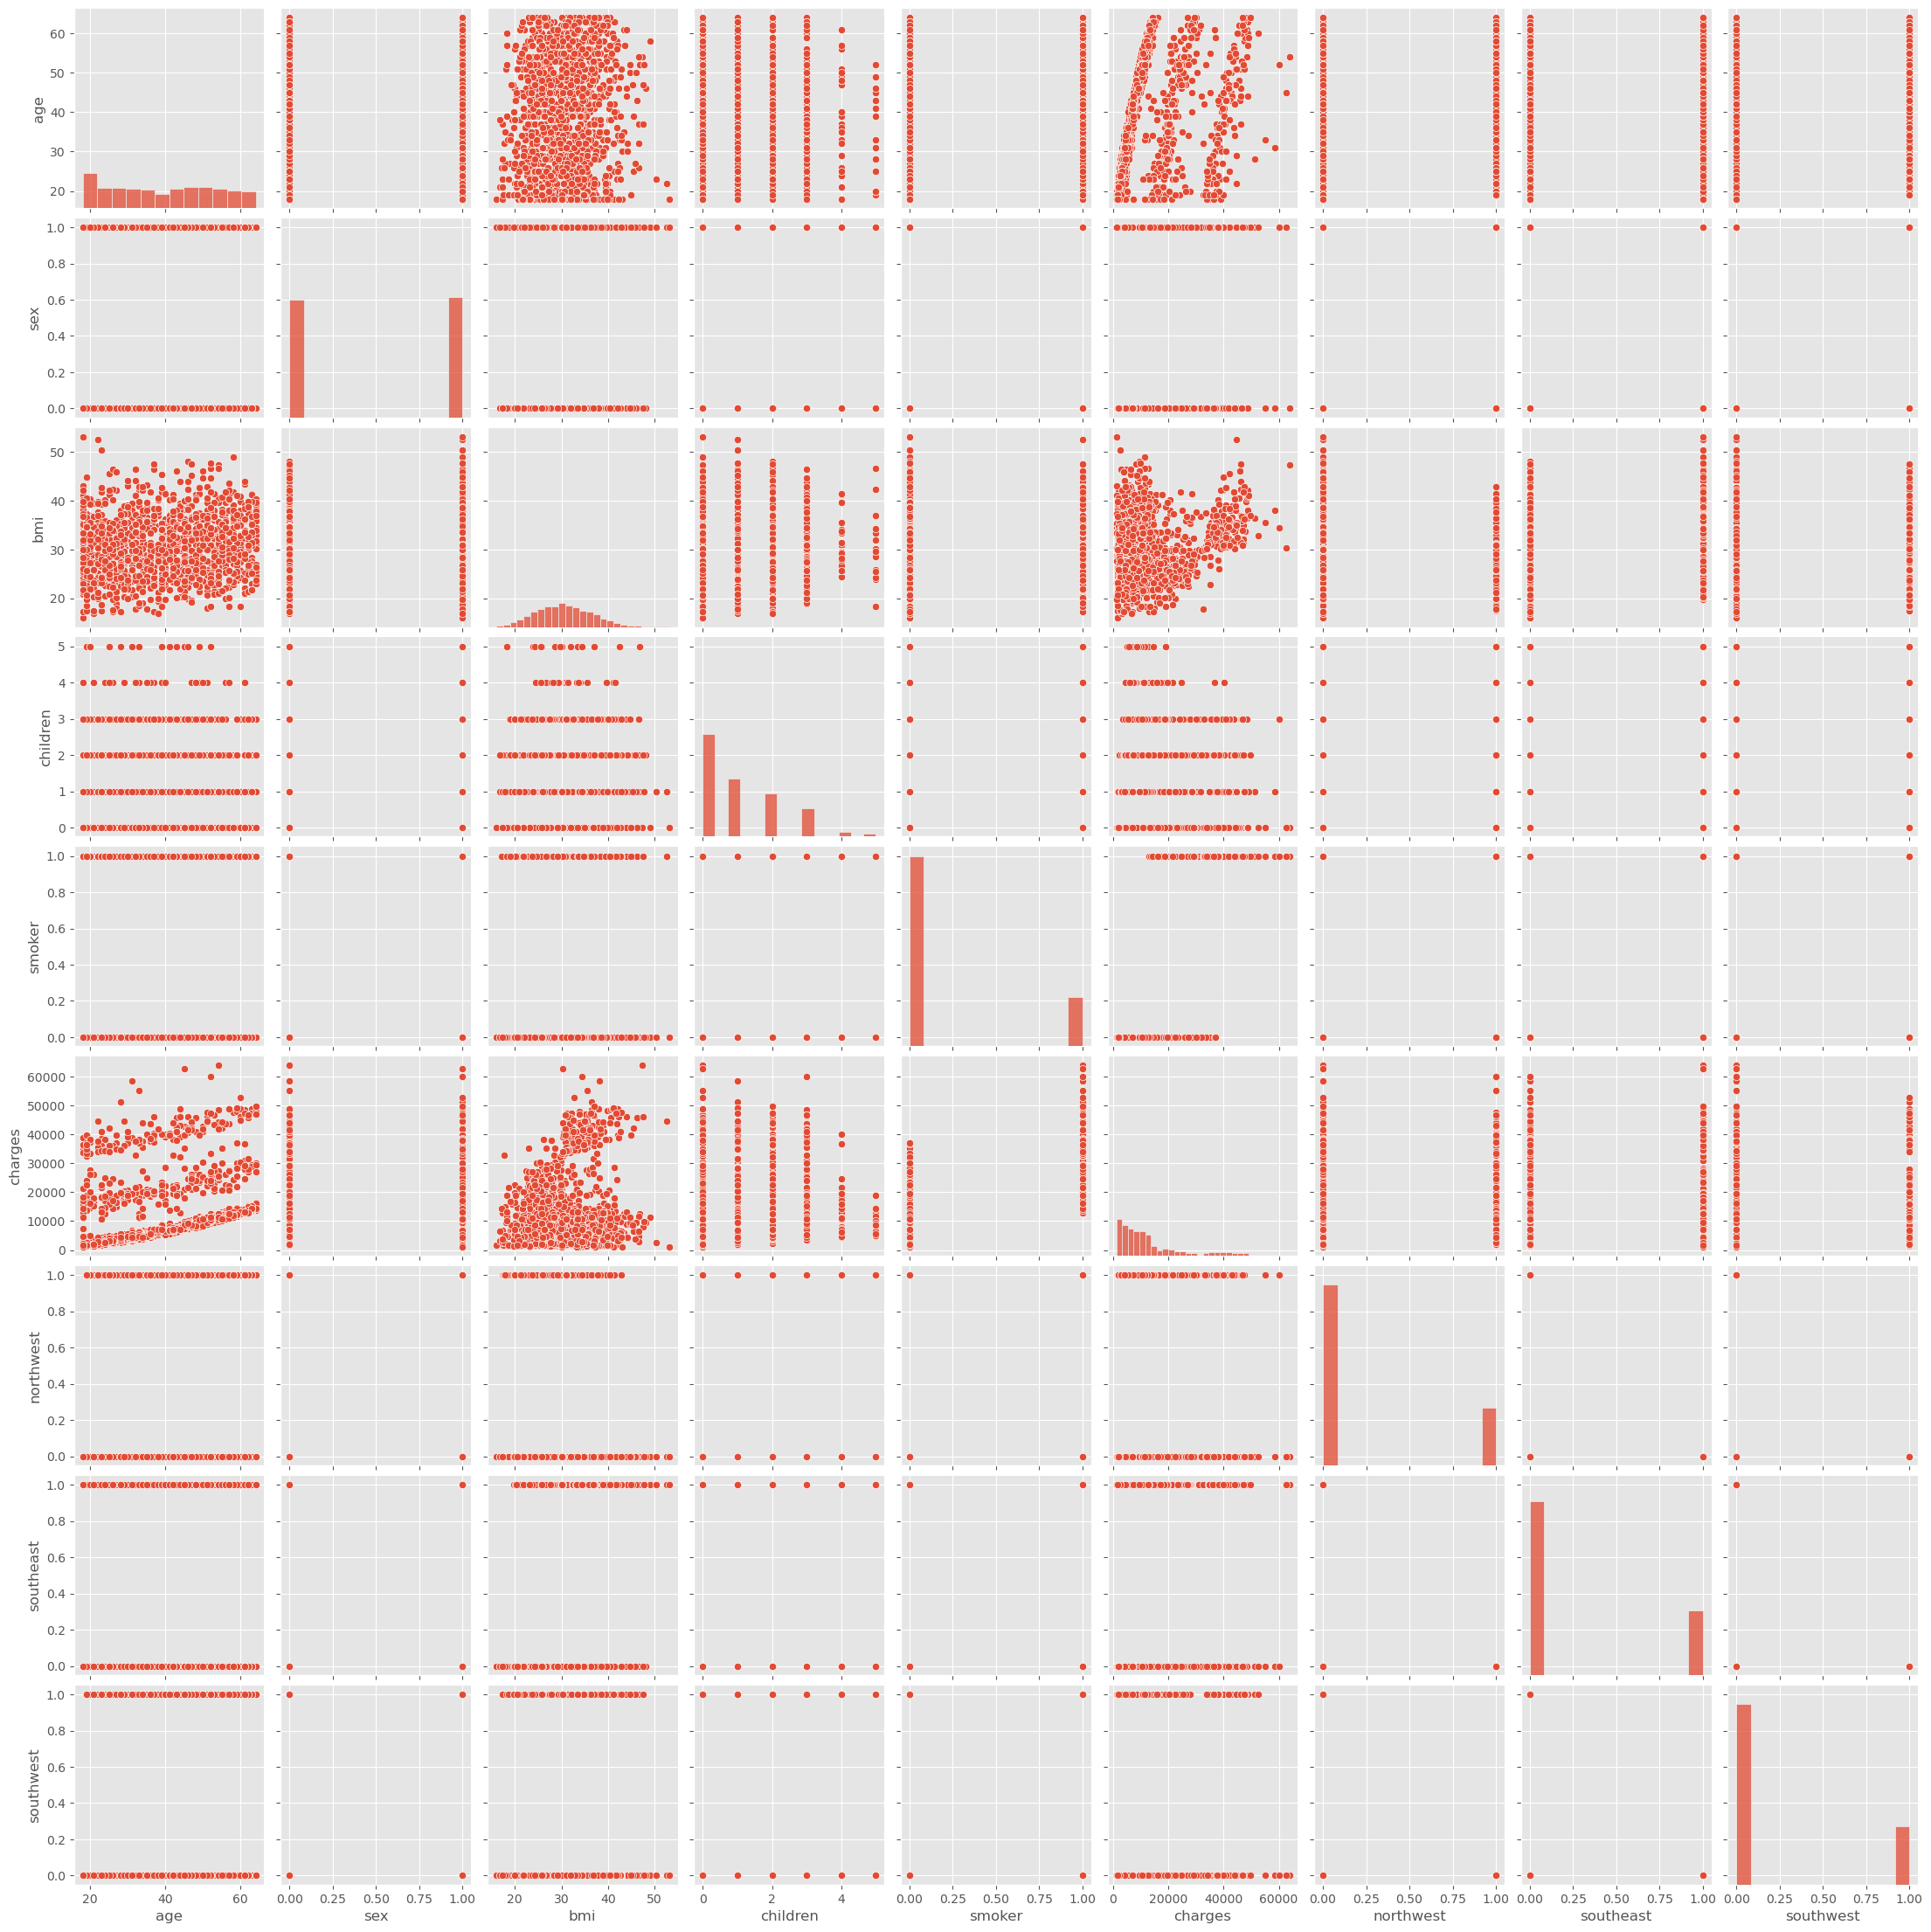

In [239]:
sns.pairplot(insurance_df)

Al verificar la relación entre la edad y los cargos, podemos ver que es más compleja que una relación lineal.

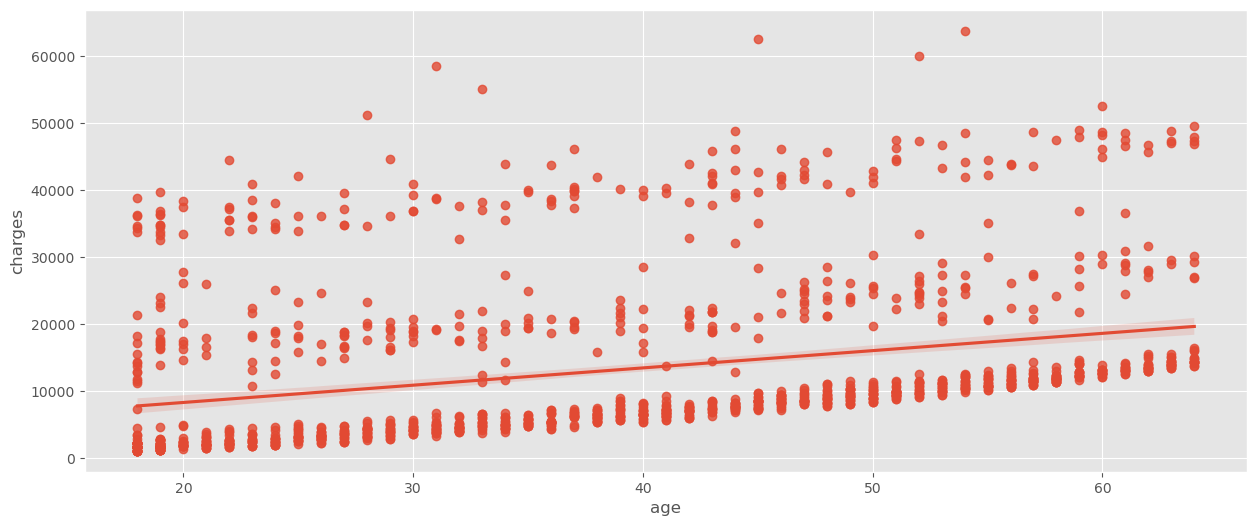

In [240]:
# Explorar la relación entre la edad y los costos
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()

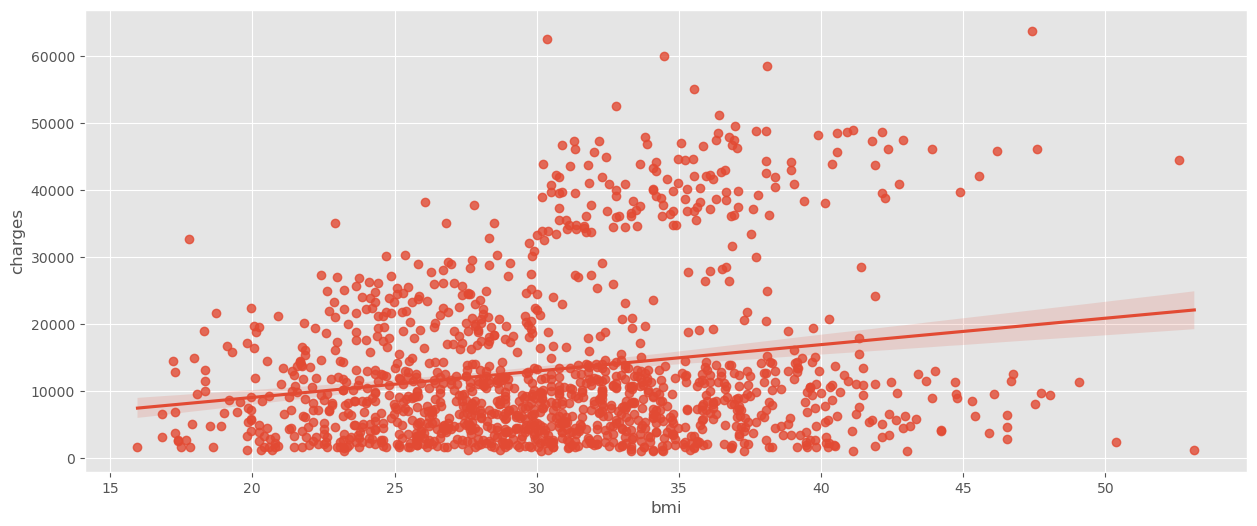

In [241]:
# Explorar la relación entre el BMI y los costos
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

In [242]:
# Compruebe la correlación
corr = insurance_df.corr()
corr

age       sex       bmi  children    smoker   charges  \
age        1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008   
sex       -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292   
bmi        0.109272  0.046371  1.000000  0.012759  0.003750  0.198341   
children   0.042469  0.017163  0.012759  1.000000  0.007673  0.067998   
smoker    -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251   
charges    0.299008  0.057292  0.198341  0.067998  0.787251  1.000000   
northwest -0.000407 -0.011156 -0.135996  0.024806 -0.036945 -0.039905   
southeast -0.011642  0.017117  0.270025 -0.023066  0.068498  0.073982   
southwest  0.010016 -0.004184 -0.006205  0.021914 -0.036945 -0.043210   

           northwest  southeast  southwest  
age        -0.000407  -0.011642   0.010016  
sex        -0.011156   0.017117  -0.004184  
bmi        -0.135996   0.270025  -0.006205  
children    0.024806  -0.023066   0.021914  
smoker     -0.036945   0.068498  -0.036945  
charges    -0.039905   0.073982  -0.043210  
northwest   1.000000  -0.346265  -0.320829  
southeast  -0.346265   1.000000  -0.346265  
southwest  -0.320829  -0.346265   1.000000

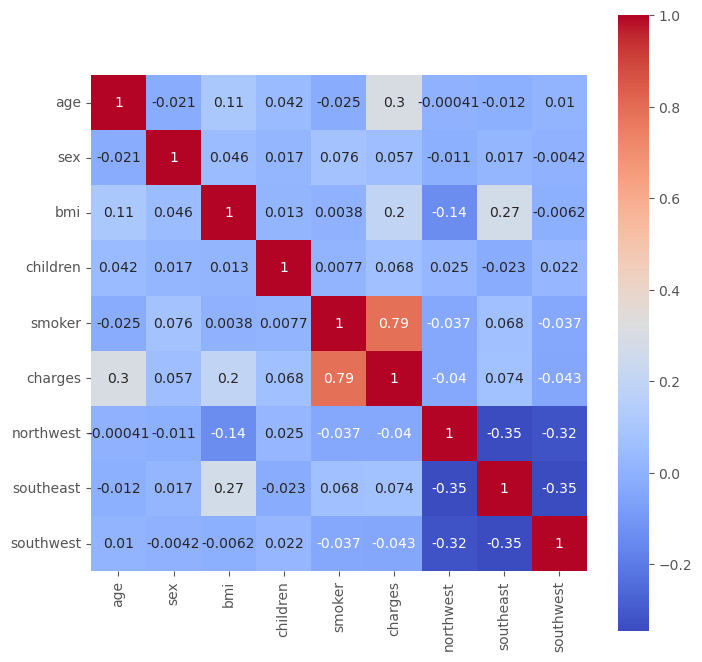

In [243]:
plt.figure(figsize=(8,8))
p = sns.heatmap(insurance_df.corr(),cmap="coolwarm",annot=True, square =True)

La varible fumador tiene la relación más positiva con las cargas.

## Dividir el conjunto de datos en Train y Test

In [244]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [245]:
X = insurance_df.drop(['charges'], axis = 1)
y = insurance_df.charges

In [246]:
display(X)
display(y)

age  sex     bmi  children  smoker  northwest  southeast  southwest
0      19    0  27.900         0       1          0          0          1
1      18    1  33.770         1       0          0          1          0
2      28    1  33.000         3       0          0          1          0
3      33    1  22.705         0       0          1          0          0
4      32    1  28.880         0       0          1          0          0
...   ...  ...     ...       ...     ...        ...        ...        ...
1333   50    1  30.970         3       0          1          0          0
1334   18    0  31.920         0       0          0          0          0
1335   18    0  36.850         0       0          0          1          0
1336   21    0  25.800         0       0          0          0          1
1337   61    0  29.070         0       1          1          0          0

[1338 rows x 8 columns]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [247]:
display(X.shape)
display(y.shape)

(1338, 8)

(1338,)

In [248]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [249]:
y_reshape = y.reshape(-1,1)

In [250]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_scale = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y_scale = scaler_y.fit_transform(y_reshape)

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale,test_size = 0.2,random_state = 42)

In [262]:
print(X_train.shape)
print(X_test.shape)
print(X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))

print(y_train.shape)
print(y_test.shape)
print(y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))

(1070, 8)
(268, 8)
0.20029895366218237
(1070, 1)
(268, 1)
0.20029895366218237


## Modelo de regresión lineal

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
from math import sqrt

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_R2 = lr.score(X_test,y_test)
lr_R2

0.7835929989814758

In [264]:
# Predict the value
y_pred = lr.predict(X_test)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

In [267]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [268]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5796.285 
MSE = 33596916.0 
MAE = 4181.195 
R2 = 0.783592939376831 
Adjusted R2 = 0.7769085514039147


## Regresión lineal múltiple (Grado = 2)

In [271]:
quad = PolynomialFeatures (degree = 2)
X_quad = quad.fit_transform(X_scale)

X_train_plr,X_test_plr,y_train_plr,y_test_plr = train_test_split(X_quad,y_scale,test_size = 0.2, random_state = 0)

plr = LinearRegression().fit(X_train_plr,y_train_plr)

plr_R2 = plr.score(X_test_plr,y_test_plr)
plr_R2

0.8802658915519714

In [272]:
y_pred = plr.predict(X_test_plr)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test_plr)

In [273]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1 - (1-r2) * (n-1)/(n-k)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE,
      '\nR2=',r2, 
      '\nAdjusted R2 =',adj_r2)

RMSE = 4365.007 
MSE = 19053286.0 
MAE = 2951.909 
R2= 0.8802658915519714 
Adjusted R2 = 0.8770422809399091


## Modelo de aprendizaje profundo (ANN)

In [275]:
pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 19.7 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
Using cached as

In [276]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale,test_size = 0.2,random_state = 42)

In [304]:
X_train.shape

(1070, 8)

In [305]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(180))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(180))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))

ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 180)            │         9,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 180)            │        32,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         9,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,311 (200.43 KB)

 Trainable params: 51,311 (200.43 KB)

 Non-trainable params: 0 (0.00 B)

In [306]:
# Compilar el modelo y entrenarlo
ANN_model.compile(optimizer= 'Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs= 50, batch_size = 20, validation_split= 0.2)

result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print('Accuracy : {}'.format(accuracy_ANN) )

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6377 - val_loss: 0.2151
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3024 - val_loss: 0.1631
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2185 - val_loss: 0.1635
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2539 - val_loss: 0.1627
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1633 - val_loss: 0.1492
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1655 - val_loss: 0.1643
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2133 - val_loss: 0.1421
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1801 - val_loss: 0.1786
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1969 - val_loss: 0.1641
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2048 - val_loss: 0.1572
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1913 - val_loss: 0.1694
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1810 - val_lo

In [307]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

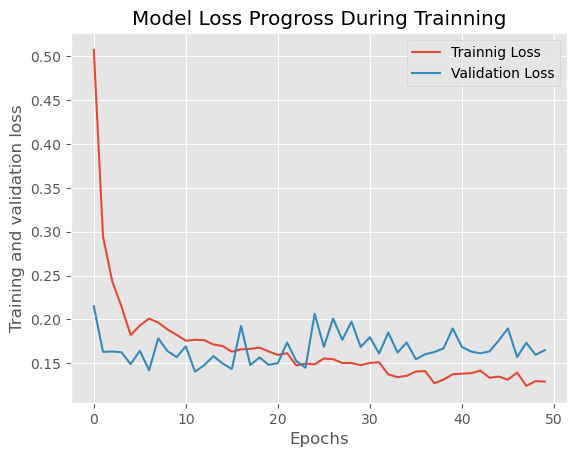

In [308]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progross During Trainning')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Trainnig Loss','Validation Loss'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Text(0, 0.5, 'True Values')

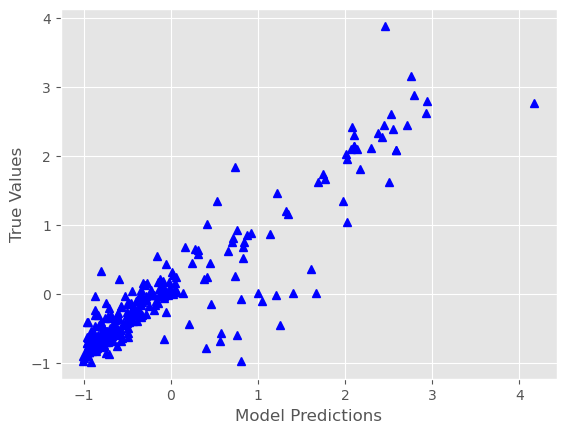

In [309]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0, 0.5, 'True Values')

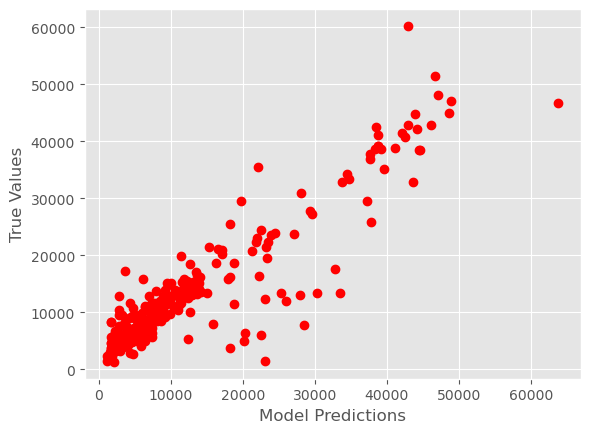

In [310]:
y_pred = ANN_model.predict(X_test)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

plt.plot(y_test_orig, y_pred_orig, "o", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [311]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1 - (1-r2) * (n-1)/(n-k)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE,
      '\nR2=',r2, 
      '\nAdjusted R2 =',adj_r2)

RMSE = 5149.863 
MSE = 26521088.0 
MAE = 3342.201 
R2= 0.8291703462600708 
Adjusted R2 = 0.8245710863516881


### Red Neuranal con Dropout

In [315]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

# Modelo con capas Dropout
ANN_model = Sequential()
ANN_model.add(Dense(50, input_dim=8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.2))  # Dropout de 20%

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))  # Dropout de 30%

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))  # Dropout de 30%

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))

ANN_model.add(Dense(1))  # Capa de salida

# Compilar modelo
ANN_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Resumen del modelo
ANN_model.summary()

# Entrenamiento
epochs_hist = ANN_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=20,
    validation_split=0.2
)

# Evaluación
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print(f'Accuracy : {accuracy_ANN:.6f}')


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9028 - val_loss: 0.2642
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3261 - val_loss: 0.2148
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2909 - val_loss: 0.2311
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2809 - val_loss: 0.1749
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2615 - val_loss: 0.1819
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2932 - val_loss: 0.1886
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1925 - val_loss: 0.2004
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2666 - val_loss: 0.1851
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2326 - val_loss: 0.1540
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2353 - val_loss: 0.1480
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2129 - val_loss: 0.2072
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2308 - val_lo

### Comparación visual con y sin Dropout

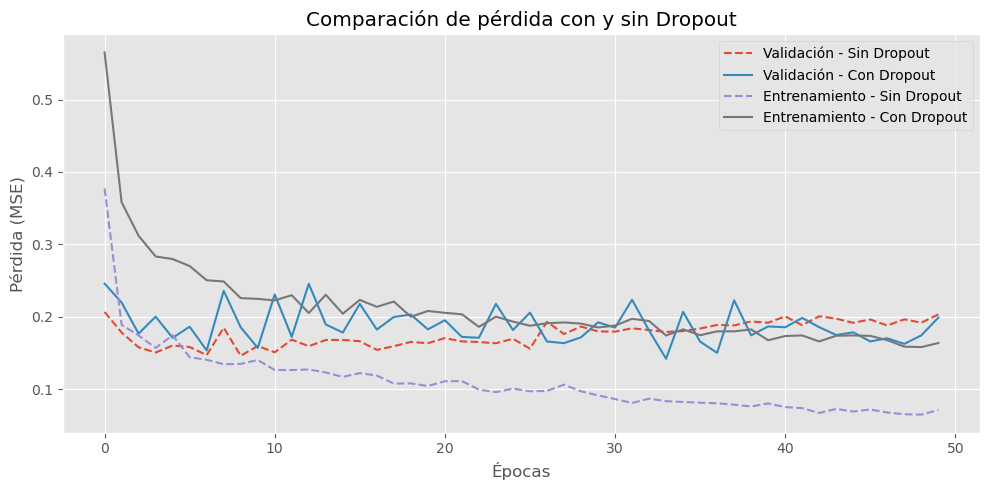

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(dropout=False):
    model = Sequential()
    model.add(Dense(50, input_dim=8))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.2))

    model.add(Dense(150))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.3))

    model.add(Dense(150))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.3))

    model.add(Dense(50))
    model.add(Activation('linear'))

    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Entrenar modelo sin Dropout
model_no_dropout = build_model(dropout=False)
hist_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=50, batch_size=20, 
                                       validation_split=0.2, verbose=0)

# Entrenar modelo con Dropout
model_with_dropout = build_model(dropout=True)
hist_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=20, 
                                           validation_split=0.2, verbose=0)

# Comparar curvas de pérdida
plt.figure(figsize=(10, 5))

plt.plot(hist_no_dropout.history['val_loss'], label='Validación - Sin Dropout', linestyle='--')
plt.plot(hist_with_dropout.history['val_loss'], label='Validación - Con Dropout', linestyle='-')

plt.plot(hist_no_dropout.history['loss'], label='Entrenamiento - Sin Dropout', linestyle='--')
plt.plot(hist_with_dropout.history['loss'], label='Entrenamiento - Con Dropout', linestyle='-')

plt.title("Comparación de pérdida con y sin Dropout")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Sin Dropout, el modelo puede tener menor pérdida de entrenamiento pero peor en validación (sobreajuste).
- Con Dropout, la validación podría estabilizarse mejor (mejor generalización).

RMSE, MAE y $R^2$

In [319]:
# Evaluar en datos de prueba 
def evaluar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

mse_nd, rmse_nd, mae_nd, r2_nd = evaluar_modelo(model_no_dropout, X_test, y_test)
mse_d, rmse_d, mae_d, r2_d = evaluar_modelo(model_with_dropout, X_test, y_test)

# Imprimir resultados
print("\n--- Modelo SIN Dropout ---")
print(f"MSE  : {mse_nd:.4f}")
print(f"RMSE : {rmse_nd:.4f}")
print(f"MAE  : {mae_nd:.4f}")
print(f"R²   : {r2_nd:.4f}")

print("\n--- Modelo CON Dropout ---")
print(f"MSE  : {mse_d:.4f}")
print(f"RMSE : {rmse_d:.4f}")
print(f"MAE  : {mae_d:.4f}")
print(f"R²   : {r2_d:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Modelo SIN Dropout ---
MSE  : 0.2206
RMSE : 0.4697
MAE  : 0.2952
R²   : 0.7917

--- Modelo CON Dropout ---
MSE  : 0.1851
RMSE : 0.4303
MAE  : 0.2611
R²   : 0.8252


## Bosque aleatorio

In [323]:
from sklearn.model_selection import GridSearchCV
# Crea la cuadrícula de parámetros en función de los resultados de una búsqueda aleatoria
param_grid = {
    'bootstrap': [True],
    'max_depth': [4, 5, 6, 7],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [10, 30, 50, 100]
}

# Crear el modelo
rf = RandomForestRegressor(criterion = 'squared_error')

# Crear la instancia del modelo de búsqueda de cuadrícula
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 4)

In [324]:
grid_search_rf.fit(X_train, y_train)

grid_search_rf.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.670 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.752 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.689 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.553 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.616 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.688 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_fe

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.604 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.725 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.726 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.707 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.787 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.720 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.690 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.731 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.726 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.637 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.654 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.749 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.799 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.703 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.626 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.608 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.710 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.701 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.790 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.709 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.761 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.817 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.752 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.798 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.761 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.733 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.802 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.808 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.773 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.878 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.812 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.801 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.816 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.812 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.783 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.755 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.796 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.825 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.863 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.771 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.787 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.767 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.868 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.748 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.831 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.863 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.837 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.754 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.817 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.829 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.903 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.901 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.827 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.895 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.835 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.787 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.904 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.900 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.785 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.831 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.906 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.899 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.903 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.821 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.824 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.817 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.767 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.842 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.820 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.830 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.802 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.784 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.842 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.774 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.828 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.764 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.674 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.662 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.828 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.784 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.808 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.865 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.727 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.753 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.744 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.785 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.821 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.758 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.747 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.832 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.833 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.741 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.819 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.693 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.726 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.832 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.772 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.775 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 3/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.798 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.713 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.716 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.784 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.818 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.894 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.884 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.824 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.821 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.769 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.769 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.776 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.823 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.829 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.816 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10;, score=0.813 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimat

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.802 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.880 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.818 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.816 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.880 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.892 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.911 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.798 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.834 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.814 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.885 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10;, score=0.791 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.802 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.836 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.814 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.842 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.778 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.793 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.914 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.846 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.821 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.795 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.842 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.766 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.849 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=30;, score=0.843 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.827 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.841 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.911 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.835 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.850 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.789 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.846 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.847 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.785 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.791 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.781 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.754 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.767 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.809 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.743 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.805 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.681 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.714 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.763 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.789 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.859 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.680 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.807 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.851 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.743 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.787 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.795 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.830 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.736 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.835 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.769 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.816 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.768 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.786 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.906 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.831 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.888 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.783 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.793 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.873 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.832 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.902 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.784 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.815 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.819 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.823 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.903 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.822 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.835 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.901 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10;, score=0.811 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.902 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.898 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.898 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.823 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.810 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.835 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.840 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.890 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.905 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.785 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.832 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.903 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.790 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.914 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.844 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.842 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.822 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.783 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.908 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.854 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.812 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.832 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.830 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.789 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.785 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.830 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=30;, score=0.839 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.797 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.816 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.800 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.825 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.788 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.851 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.789 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.823 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.872 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.838 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.763 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.919 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.825 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.798 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.813 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.791 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=10;, score=0.795 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.795 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.886 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.852 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.823 total time=   0.1s[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.804 total time=   0.0s

[CV 2/5] END bootstrap=True, max_depth=6, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.916 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.879 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.812 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.816 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.817 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.873 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.775 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.702 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.771 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.776 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.809 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.792 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.848 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=30;, score=0.823 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.753 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.808 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.743 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.824 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.744 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.776 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.811 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.863 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.824 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.778 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.783 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.779 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.846 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.780 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 2/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.894 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.823 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.803 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.797 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.772 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.792 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.813 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.821 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.839 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.779 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.836 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.819 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.819 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.906 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.809 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.904 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.828 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.835 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.792 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.901 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.828 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.835 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.834 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.845 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.849 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.836 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.813 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.783 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.844 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.831 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.796 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.820 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimato

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.830 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.842 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.915 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.907 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.812 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.836 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.837 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.837 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.839 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.915 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 4/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.794 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.836 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.822 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=0.837 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.784 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10;, score=0.843 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.835 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.857 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.909 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.852 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.830 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.827 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=3, n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.828 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.917 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.838 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.916 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.825 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.795 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estim

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True,
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [325]:
grid_search_rf_R2 = grid_search_rf.score(X_test,y_test)
grid_search_rf_R2

0.8769533929929038

In [327]:
y_pred = grid_search_rf.predict(X_test)

y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [328]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1 - (1-r2) * (n-1)/(n-k)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE,
      '\nR2=',r2, 
      '\nAdjusted R2 =',adj_r2)

RMSE = 4370.678 
MSE = 19102829.35180142 
MAE = 2561.209874988551 
R2= 0.8769533952846812 
Adjusted R2 = 0.8736406020808072


## XGBoost

In [ ]:
#! pip install xgboost
import xgboost as xgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.1 MB/s eta 0:00:00


In [330]:
param_grid = {
        'gamma': [0.1,0.3, 0.5, 1],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5], # depth of each tree
        'n_estimaters': [10, 30, 50, 100],
        'learning_rate' :[0.01, 0.03, 0.05]
        }

In [331]:
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror')

grid_xgb = GridSearchCV(xgb_model,
                    param_grid,
                    cv = 5, 
                    n_jobs = -1, 
                    verbose = 4)

In [332]:
grid_xgb.fit(X_train, y_train)

grid_xgb.best_params_

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.542 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.504 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.502 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.541 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.492 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.483 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.482 total time=   0.0s

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.479 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.541 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.503 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.514 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.540 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.479 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.540 total time=   0.0

conda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/l

[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.500 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.495 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.540 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.537 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.476 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.848 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.774 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.771 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.843 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.769 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.763 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.771 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.758 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.771 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.812 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.763 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.755 total time=   0.0s[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.812 total time=   0.0s

[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.755 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.752 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.817 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.808 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.803 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.773 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.803 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.773 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.767 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.773 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.542 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.482 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.541 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.890 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.507 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.541 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.890 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.488 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.771 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.538 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.496 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.488 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.488 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.496 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.848 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.537 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.775 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.845 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.770 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.775 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.477 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.772 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.759 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.759 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.844 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.759 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.757 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.844 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.778 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.815 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.828 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.817 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.830 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.802 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.904 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.802 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.896 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.801 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.769 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.769 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.769 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.795 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.510 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.542 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.515 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.497 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.502 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.504 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.509 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.505 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.483 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.505 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.542 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.542 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.485 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.542 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.510 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.845 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.775 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.734 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.510 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.774 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.540 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.763 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.731 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.762 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.756 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.762 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.768 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.770 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.779 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.815 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.815 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.779 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.900 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.904 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.826 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.509 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.483 total time=   0.0s[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.509 total time=   0.0s

[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.542 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.541 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.542 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.542 total time=   0.0s
[CV 5/5] E

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.847 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.479 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.771 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.773 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.509 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.479 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.775 total time=   0.0s
[CV 5/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.766 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.770 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.766 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.730 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.844 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.730 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.728 total time=   0.0s
[CV 1/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.819 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.830 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.819 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.817 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.817 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.809 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.817 total time=   0.0s
[CV 1/5] END

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.899 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.806 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.806 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.814 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.806 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.806 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.774 total time=   0.0s
[CV 2/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.585 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.614 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.613 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.678 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.639 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.612 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.638 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.632 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.830 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.815 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.834 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.581 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.632 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.580 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.900 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.900 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.824 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.900 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.832 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.825 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.832 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.920 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.897 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.819 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.819 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.819 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.796 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.799 total time=   0.1s

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.815 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.815 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.846 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.846 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.815 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.828 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.920 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.821 total time=   0.0s[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.616 total time=   0.0s

[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.613 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.802 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.637 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.802 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.802 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.616 total time=   0.0s[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.638 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.673 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.674 total time=   0.0s

[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.586 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.674 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.614 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.636 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.675 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.834 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.579 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.675 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.828 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.604 total time=   0.1

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.814 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.783 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.808 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.904 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.830 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.824 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.824 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.773 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.895 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.773 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.798 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.916 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.823 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.916 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.798 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.820 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.913 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.798 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.913 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.796 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.832 total time=   0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.638 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.819 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.613 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.827 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.827 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.792 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.792 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.672 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.609 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.610 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.613 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.613 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.637 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.606 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.818 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.782 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.783 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.610 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.635 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.825 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.901 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.899 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.780 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.899 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.780 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.825 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.780 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.801 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.801 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.856 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.801 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.920 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.818 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.835 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.853 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.829 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.914 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.796 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.823 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.829 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.794 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.848 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.611 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.613 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.609 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.612 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.637 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.639 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.613 total time=   0.0s
[CV 3/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.583 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.583 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.677 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.671 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.671 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.584 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.611 total time=   0.0s
[CV 2/5] END

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.832 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.831 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.902 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.583 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.902 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.810 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.824 total time=   0.0s
[CV 5/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.826 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.826 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.817 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.808 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.817 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.817 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.808 total time=   0.0s
[CV 2/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.825 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.832 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.796 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.830 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.795 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.825 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.914 total time=   0.0s
[CV 2/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.746 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.681 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.788 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.681 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.746 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.681 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.819 total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.718 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.707 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.683 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.683 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.707 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.748 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.790 total time=   0.0s

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.840 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.831 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.683 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.683 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.915 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.748 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.798 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.914 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.914 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.840 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.914 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.848 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.848 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.848 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.816 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.844 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.792 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.912 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.912 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.920 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.837 total time=   0.1

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.829 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.835 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.820 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.800 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.802 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.835 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=1.0;, score=0.839 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.829 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.809 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.829 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.809 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.829 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.848 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.790 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.684 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.720 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.910 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.793 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.910 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.702 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.681 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.702 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.789 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.749 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.787 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.748 total time=   0.0s[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.6;, score=0.789 total time=   0.0s

[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.721 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.682 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.798 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.790 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.682 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.795 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.749 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.840 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.839 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.825 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.839 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.840 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.915 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.825 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=0.6;, score=0.795 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.798 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.837 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.802 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.800 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.840 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.795 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.919 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.826 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.798 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=10, subsample=0.8;, score=0.820 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.915 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.826 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.915 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.835 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.913 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.746 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.850 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.746 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.746 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.719 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.707 total time=   0.0s

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.786 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.748 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.685 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.748 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.748 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.748 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.748 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=0.8;, score=0.684 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.684 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=50, subsample=0.6;, score=0.789 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.915 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.915 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.798 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.6;, score=0.789 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.850 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.826 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.850 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.915 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.839 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.798 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.826 total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.796 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.918 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.838 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.833 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=0.8;, score=0.838 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=5, n_estimaters=10, subsample=1.0;, score=0.796 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.837 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.916 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.856 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.799 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.829 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.856 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.833 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.859 total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=5, n_estimaters=100, subsample=1.0;, score=0.828 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.786 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.8;, score=0.719 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.8;, score=0.683 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.786 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.683 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.786 total time=   0.0s
[CV 1/5]

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.682 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=3, n_estimaters=100, subsample=0.6;, score=0.746 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.6;, score=0.746 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.721 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.787 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.704 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.704 total time=   0.0s
[CV 5/5] END

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=0.8;, score=0.913 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.796 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=100, subsample=0.8;, score=0.747 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.838 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=30, subsample=1.0;, score=0.911 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, n_estimaters=30, subsample=1.0;, score=0.682 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.850 total time=   0.0s
[CV 4/5] END

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=1.0;, score=0.912 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=30, subsample=1.0;, score=0.912 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=0.6;, score=0.849 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=50, subsample=1.0;, score=0.838 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=10, subsample=0.6;, score=0.849 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.849 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=3, n_estimaters=100, subsample=1.0;, score=0.830 total time=   0.0s
[CV 5/5] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.831 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=0.6;, score=0.832 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.8;, score=0.832 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=10, subsample=1.0;, score=0.797 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=50, subsample=0.6;, score=0.839 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=3, n_estimaters=30, subsample=0.6;, score=0.832 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.03, max_depth=5, n_estimaters=50, subsample=1.0;, score=0.838 total time=   0.0s
[CV 4/5] END 

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=30, subsample=0.8;, score=0.854 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=10, subsample=0.8;, score=0.801 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.6;, score=0.839 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=50, subsample=0.8;, score=0.801 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.801 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=1.0;, score=0.838 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=4, n_estimaters=100, subsample=0.8;, score=0.854 total time=   0.0s
[CV 2/5] 

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimaters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/ana

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimaters': 10,
 'subsample': 0.6}

In [333]:
grid_xgb_R2 = grid_xgb.score(X_test,y_test)
grid_xgb_R2

0.8826316595077515

In [335]:
y_pred = grid_xgb.predict(X_test)

y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [336]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1 - (1-r2) * (n-1)/(n-k)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE,
      '\nR2=',r2, 
      '\nAdjusted R2 =',adj_r2)

RMSE = 4268.64 
MSE = 18221290.0 
MAE = 2511.0469 
R2= 0.8826316595077515 
Adjusted R2 = 0.8794717426483447
